In [ ]:
#
#  PyEarthScience:  read_netCDF_with_xarray.py
#
#  Description:
#    Demonstrate the use of xarray to open and read the content of 
#    a netCDF file. 
# 
#  Author:
#    Karin Meier-Fleischer
#  
#  Date of initial publication:
#    April, 2019
#
'''
  PyEarthScience:  read_netCDF_with_xarray.py

  Description:
    Demonstrate the use of xarray to open and read the content of
    a netCDF file. 

  - xarray
  - netCDF

  2019-04-14  kmf
'''

import os
import numpy as np
import xarray as xr

#-- input file rectilinear_grid_3d.nc from the NCL User Guide
#-- is available in the PyNGL installation
fname = '/poorgafile1/climate/hdcp2/2013/3d_fuzzy_hope_ll_DOM03_ML_20130502T180000Z.nc'

#-- open file
ds = xr.open_dataset(fname)

print('------------------------------------------------------')
print()
print('--> ds        ', ds)
print()

#-- read variable t, first timestep, first level
#var = xr.open_dataset(fname).time.isel(time=0,lev=0)
var = xr.open_dataset(fname).clw.isel(time=0,height=0)

#-- read variable latitude and longitude arrays
lat = xr.open_dataset(fname).lat
lon = xr.open_dataset(fname).lon

print('------------------------------------------------------')
print()
print('-->   ', xr.open_dataset(fname))
print()

#-- print the size and shape of the variable
print('------------------------------------------------------')
print()
print('--> var.size           ',var.size)
print('--> var.shape          ',var.shape)

#-- the above notation has the same results as below
#f    = xr.open_dataset(fname)
#data = f['t'][0,0,:,:]                   #-- first time step, all latitude
#lat  = f['lat'][:]                       #-- all latitudes
#lon  = f['lon'][:]                       #-- all longitudes
print()

#-- print the minimum and maximum of lat and lon
print('------------------------------------------------------')
print()
print('--> lat min             ', lat.min().values)
print('--> lat max             ', lat.max().values)
print('--> lon min             ', lon.min().values)
print('--> lon max             ', lon.max().values)

#-- the above notation has the same results as below
#print('--> lat min             ', lat.min().item())
#print('--> lat max             ', lat.max().item())
#print('--> lon min             ', lon.min().item())
#print('--> lon max             ', lon.max().item())
print()

#-- print variable information
print('------------------------------------------------------')
print()
print('--> var')
print()
print(var)
print()

#-- retrieve the name of the coordinates lat/lon and the values of 
#-- the shape of the coordinates
dimslat  = lat.dims[0]
shapelat = lat.shape[0]
dimslon  = lon.dims[0]
shapelon = lon.shape[0]
nrlat    = shapelat
nrlon    = shapelon

print('------------------------------------------------------')
print()
print('--> dimslat: ',dimslat, '  dimslon: ',dimslon,'  nrlat: ',nrlat,'  nrlon: ',nrlon)
print()

#-- print the variable attributes
print('------------------------------------------------------')
print()
print('--> attributes:       ',var.attrs)
print()

#-- print the variable values
print('------------------------------------------------------')
print()
print('--> values            ')
print()
print(var.values)
print()

#-- print the type of the variable (DataArray)
print('------------------------------------------------------')
print()
print('--> type(var)         ',type(var))
print()

#-- print the type of the variable values (numpy.ndarray)
print('------------------------------------------------------')
print()
print('--> type(var.values)  ',type(var.values))
print()

#-- select variable t from dataset for first timestep
print('------------------------------------------------------')
print()
print('--> dataset variable t (time=0, height=6)')
print()
print(ds.clw.isel(time=0,height=6).values)
print()

#-- select variable t from dataset, lat index 1 and lon index 2
print('------------------------------------------------------')
print()
print('--> dataset variable t select data which is closest to lat=1 and lon=2')
print()
print(ds.clw.isel(lat=1, lon=2).values)
print()

#-- select variable t, timestep 2001-01-01
print('------------------------------------------------------')
print()
print('--> time=20130502.75')
print()
print(ds.clw.sel(time=20130502.75))
print()

#-- select a sub-region (slice)
print('------------------------------------------------------')
print()
print('--> select sub-region')
print()
print(ds.clw.sel(lat=slice(20, 0), lon=slice(-25, 0), time=220130502))
print()

#-- select slice nearest neighbor with tolerance
print('------------------------------------------------------')
print()
print('--> select slice nearest neighbor with tolerance')
print()
print(ds.clw.sel(lat=5.0, lon=1.0, method='nearest', tolerance=2).values)
print()

#-- print dataset minimum/maximum: prints the name of the variables, 
#-- their types and minimum value
print('------------------------------------------------------')
print()
print('--> print dataset min')
print()
print(ds.min().values)
print()
print('--> print dataset max')
print()
print(ds.max().values)
print()

#-- print median values of variable t of dataset, one value for each level
print('------------------------------------------------------')
print()
print('--> variable median')
print()
print(ds.clw.median(dim=['lat', 'lon']).values)
print()

#-- compute the means of the variable t of the dataset, one value for each level
print('------------------------------------------------------')
print()
print('--> means')
print()
means = ds.clw.mean(dim=['lat', 'lon'])
print(means.values)
print()

#-- compute the mean of the variable t which are greater than 273.15 K
print('------------------------------------------------------')
print()
print('--> only means greater than 273.15 K')
print()
print(means.where(means > 273.15).values)
print()

NameError: name 'ds' is not defined

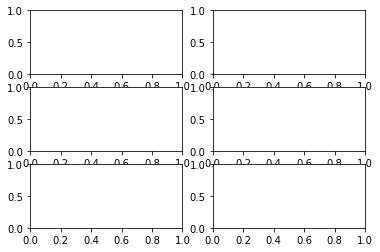

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2)
ax0, ax1, ax2, ax3, ax4,ax5 = axes.flatten()

da = ds.tkvh # Draw coastlines of the Earth
da2 = ds2.tkvh # Draw coastlines of the Earth
da3 = ds3.tkvh # Draw coastlines of the Earth
da = ds_c.tkvh 
da2_c = ds2_c.tkvh 
da3_c = ds3_c.tkvh 

ax0= plt.axes(projection=ccrs.PlateCarree())
ax1= plt.axes(projection=ccrs.PlateCarree())
ax2= plt.axes(projection=ccrs.PlateCarree())
ax3= plt.axes(projection=ccrs.PlateCarree())
ax4= plt.axes(projection=ccrs.PlateCarree())
ax5= plt.axes(projection=ccrs.PlateCarree())


ax0.coastlines() 
ax1.coastlines() 
ax2.coastlines() 
ax3.coastlines() 
ax4.coastlines() 
ax5.coastlines() 

ax.plot(da)
ax1.plot(da2)
ax2.plot(da3)
ax3.plot(da_c)
ax4.plot(da2_c)
ax5.plot(da3_c)

plt.show()